In [71]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
files = os.listdir("C:/Users/hp/Desktop/task/task.llc/data")

In [2]:
files

['annual average expenditure 55-64.csv',
 'average expenditure 25-34.csv',
 'average expenditure 35-44.csv',
 'average_annual_expenditure_45-54.csv',
 'construction_workers_wages_index.csv',
 'consumer_price_index.csv',
 'employees_construction.csv',
 'GDP.csv',
 'HCAI_GOVT.csv',
 'HCAI_GOVT.xls',
 'HCAI_GSE.csv',
 'HCAI_GSE.xls',
 'HCAI_PP.csv',
 'HCAI_PP.xls',
 'homeownershiprate.csv',
 'houses_for_sale_to_houses_sold.csv',
 'Industrial_production_cement.csv',
 'job gains private.csv',
 'MORTGAGE30US.csv',
 'new_privately_owned_housing_under_construction.csv',
 'nonresidentialsa-valueOfConstriction-Monthly.csv',
 'nonresidentialsa-valueOfConstriction-Monthly.xls',
 'non_residential_private_construction_spending.csv',
 'Permits_Granted_Monthly.csv',
 'personal saving rate.csv',
 'Population_Quarterly.csv',
 'poverty_rate.csv',
 'privately_owned_housing_units_completed.csv',
 'producer_price_index_concrete_brick.csv',
 'renter_occupied_housing_rate.csv',
 'residentialsa-ValueOfConstruc

In [3]:
##for interpolating annual data to monthly data
monthly_rng=pd.date_range("01-2001","01-2021",freq="M")
monthly_rng

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', length=240, freq='M')

In [4]:
qtr_rng = pd.date_range("01-2001","1-2021", freq = "Q")
qtr_rng

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
      

In [74]:
# Converting annual data to monthly data

def annual_monthly(annual_values, index_for_new_df, digits=2):
    monthly_values = []
    
    for i in range(1, len(annual_values)):
        annual_change = annual_values[i] - annual_values[i-1]
        monthly_change = round(annual_change / 12, digits)
        prev_value = annual_values[i-1]
        
        for j in range(12):
            monthly_values.append(prev_value + monthly_change)
            prev_value = prev_value + monthly_change
            
    return pd.DataFrame(monthly_values, index=index_for_new_df)

#Converting quarterly data to monthly data

#def quaterly_monthly(quaterly_values, index_for_new_df, digits=2):
#    monthly_values = []
    
#    for i in range(1, len(quaterly_values)):
#        quaterly_change = quaterly_values[i] - quaterly_values[i-1]
#        monthly_change = round(quaterly_change / 3, digits)
#        tchange = [quaterly_values[i-1] + monthly_change * k for k in range(3)]
#        monthly_values.extend(tchange)
#            
#    return pd.DataFrame(monthly_values, index=index_for_new_df)

# Function to convert quarterly data to monthly data
def quaterly_monthly(quaterly_values, index_for_new_df, digits=2):
    monthly_values = []

    for i in range(1, len(quaterly_values)):
        quaterly_change = quaterly_values[i] - quaterly_values[i-1]
        monthly_change = round(quaterly_change / 3, digits)
        prev_value = quaterly_values[i-1]

        for j in range(3):
            monthly_values.append(prev_value + monthly_change)
            prev_value = prev_value + monthly_change

    # Trim the monthly_values list to match the length of index_for_new_df
    monthly_values = monthly_values[:len(index_for_new_df)]

    return pd.DataFrame(monthly_values, index=index_for_new_df)

## Annual Average Expenditure 55-64

In [6]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/annual average expenditure 55-64.csv")
tdf = tdf[["Year","Value"]]

tdf.Year = tdf.Year.astype("str")
tdf.Year = pd.to_datetime(tdf.Year,format="%Y")


tdf = annual_monthly(tdf["Value"],monthly_rng,0)

tdf.rename(columns = {0:"avg_expenditure_55_64"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")


tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/avg-expenditure-55-64.csv",index=True)

## Annual Average expenditure 25-34

In [7]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/average expenditure 25-34.csv")
tdf = tdf[["Year","Value"]]

tdf.Year = tdf.Year.astype("str")
tdf.Year = pd.to_datetime(tdf.Year,format="%Y")


tdf = annual_monthly(tdf["Value"],monthly_rng,0)

tdf.rename(columns = {0:"avg_expenditure_25_34"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")

tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/avg-expenditure-25-34.csv",index=True)

## Annual Average Expenditure 35-44

In [8]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/average expenditure 35-44.csv")
tdf = tdf[["Year","Value"]]

tdf.Year = tdf.Year.astype("str")
tdf.Year = pd.to_datetime(tdf.Year,format="%Y")


tdf = annual_monthly(tdf["Value"],monthly_rng,0)

tdf.rename(columns = {0:"avg_expenditure_35_44"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")

tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/avg-expenditure-35-44.csv",index=True)

In [9]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/average_annual_expenditure_45-54.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf = tdf["2000-01":"2020-12"]


tdf = annual_monthly(tdf["CXUTOTALEXPLB0405M"],monthly_rng,0)

tdf.rename(columns = {0:"avg_expenditure_45_54"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf

tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/avg-expenditure-45-54.csv",index=True)

## Consumer Price Index

In [10]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/consumer_price_index.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%d-%m-%Y")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf = tdf["2001-01":"2020-12"]
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/consumer_price_index.csv")

## Employees Construction

In [11]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/employees_construction.csv")
tdf
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf = tdf["2001-01":"2020-12"]
tdf.rename(columns={"USCONS":"employees_construction"},inplace=True)
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/employees_construction.csv")

<Axes: xlabel='DATE', ylabel='employees_construction'>

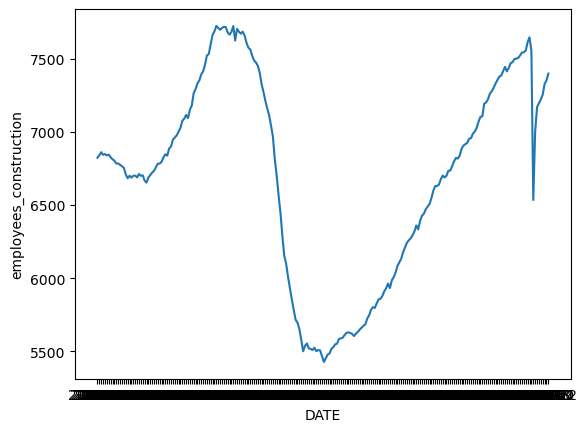

In [12]:
sns.lineplot(data=tdf, x="DATE", y="employees_construction")

## GDP

In [13]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/GDP.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%d-%m-%Y")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf = tdf["2001-01":"2021-01"]
tdf = quaterly_monthly(tdf.GDP,monthly_rng)


tdf.rename(columns = {0:"GDP"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/GDP.csv")

## HCAI_GOVT

In [15]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/HCAI_GOVT.csv")
quarters = {1:1,2:4,3:7,4:10}

tdf.Quarter= tdf.Quarter.map(quarters)
tdf.Year = tdf.Year.astype("str") + "-" + tdf.Quarter.astype("str")

tdf["DATE"] = pd.to_datetime(tdf.Year,format="%Y-%m")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"Year","DATE","Quarter","Borrower\nRisk","Product\nRisk"},inplace=True)
tdf = tdf["2001-01":"2021-04"]
tdf = quaterly_monthly(tdf["Total\nRisk"],monthly_rng)


tdf.rename(columns = {0:"HCAI_GOVT"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/HCAI_GOVT.csv")

## HCAI_GSE

In [16]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/HCAI_GSE.csv")
quarters = {1:1,2:4,3:7,4:10}

tdf.Quarter= tdf.Quarter.map(quarters)
tdf.Year = tdf.Year.astype("str") + "-" + tdf.Quarter.astype("str")

tdf["DATE"] = pd.to_datetime(tdf.Year,format="%Y-%m")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"Year","DATE","Quarter","Borrower\nRisk","Product\nRisk"},inplace=True)
tdf = tdf["2001-01":"2021-4"]
tdf = quaterly_monthly(tdf["Total\nRisk"],monthly_rng)


tdf.rename(columns = {0:"HCAI_GSE"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/HCAI_GSE.csv")

## HCAI_PP

In [17]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/HCAI_PP.csv")
quarters = {1:1,2:4,3:7,4:10}

tdf.Quarter= tdf.Quarter.map(quarters)
tdf.Year = tdf.Year.astype("str") + "-" + tdf.Quarter.astype("str")

tdf["DATE"] = pd.to_datetime(tdf.Year,format="%Y-%m")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"Year","DATE","Quarter","Borrower\nRisk","Product\nRisk"},inplace=True)
tdf = tdf["2001-01":"2021-4"]
tdf = quaterly_monthly(tdf["Total\nRisk"],monthly_rng)


tdf.rename(columns = {0:"HCAI_PP"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/HCAI_PP.csv")

## homeownershiprate

In [ ]:
tdf = pd.read_csv("../data/homeownershiprate.csv")

tdf = tdf.iloc[::-1].reset_index(drop=True)


quaters = tdf[["First","Second","Third","Fourth"]]

quaterly_values = []
for i in range(21):
    quaterly_values.extend(quaters.T[i])
    
tdf = quaterly_monthly(quaterly_values,monthly_rng)
tdf.rename(columns = {0:"home-ownership-rate"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf
tdf.to_csv("../data_cleaned/home-ownership-rate.csv")

## houses_for_sale_houses_sold

In [32]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/houses_for_sale_to_houses_sold.csv")
tdf["DATE"] = pd.to_datetime(tdf.DATE,format="%Y-%m")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)

tdf = tdf["2001-01":"2020-12"]
tdf.rename(columns={"MSACSR":"houses-for-sale-to-sold"},inplace=True)

tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/houses_for_sale_to_houses_sold.csv")

## job gains private

In [35]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/job gains private.csv")

def quaterly_monthly_changed(quaterly_values, index_for_new_df, digits=2):
    monthly_values = []

    for i in range(0, len(quaterly_values) - 3, 4):
        tlist = list(quaterly_values[i:i + 4])

        for j in range(0, 4):
            quaterly_change = tlist[j]
            monthly_change = round(quaterly_change / 3, digits)
            tchange = [monthly_change] * 3
            monthly_values.extend(tchange)

    # Trim the monthly_values list to match the length of index_for_new_df
    monthly_values = monthly_values[:len(index_for_new_df)]

    return pd.DataFrame(monthly_values, index=index_for_new_df)
    
    
tdf = quaterly_monthly_changed(tdf["Value"],monthly_rng)
tdf.rename(columns={"0":"job_gains_private"},inplace=True)
tdf
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/job_gains_private.csv")

In [37]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/MORTGAGE30US.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%d-%m-%Y")
tdf.set_index("DATE",inplace=True)
tdf = tdf.resample("M").mean()
tdf.index = tdf.index.strftime("%Y-%m")
tdf = tdf["2001-01":"2020-12"]
tdf
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/MORTGAGE_30US.csv")

## new_privately_owned_housing_under_construction

In [39]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/new_privately_owned_housing_under_construction.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.set_index("DATE",inplace=True)

tdf.index = tdf.index.strftime("%Y-%m")
tdf = tdf["2001-01":"2020-12"]
tdf.rename(columns={"UNDCONTSA":"pvt_owned_house_under_const"},inplace=True)
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/new_privately_owned_housing_under_construction.csv")
tdf

,pvt_owned_house_under_const
DATE,
2001-01,986.0
2001-02,987.0
2001-03,1001.0
2001-04,1007.0
2001-05,1015.0
...,...
2020-08,1212.0
2020-09,1218.0
2020-10,1228.0


## residentailsa-ValueOfConstruction

In [44]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/residentialsa-ValueOfConstruction.csv")
tdf = tdf.drop([0,21,22], axis=0).reset_index(drop=True)
monthly_data = tdf.loc[:, tdf.columns != "Year"]

monthly_values = []
for _, column in monthly_data.iteritems():
    monthly_values.extend(column)

# Truncate monthly_values to match the length of monthly_rng
monthly_values = monthly_values[:len(monthly_rng)]

tdf = pd.DataFrame(monthly_values, index=monthly_rng)
tdf[0] = tdf[0].str.replace(",", "").astype("int")
tdf.rename(columns={0: "residential_const_val"}, inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/residential_construction_val.csv")
tdf

C:\Users\hp\AppData\Local\Temp\ipykernel_10280\2504320895.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, column in monthly_data.iteritems():


,residential_const_val
2001-01,348279
2001-02,377631
2001-03,417788
2001-04,498640
2001-05,575650
...,...
2007-08,597672
2007-09,360534
2007-10,394223
2007-11,421143


## nonresidential-valueOfConstruction-Monthly

In [47]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/nonresidentialsa-valueOfConstriction-Monthly.csv")
tdf = tdf.drop([0], axis=0).reset_index(drop=True)
monthly_data = tdf.loc[:, tdf.columns != "Year"]

monthly_values = []
for _, column in monthly_data.items():
    monthly_values.extend(column)

# Trim the monthly_values list to match the length of monthly_rng
monthly_values = monthly_values[:len(monthly_rng)]

tdf = pd.DataFrame(monthly_values, index=monthly_rng)
tdf[0] = tdf[0].str.replace(",", "").astype("int")
tdf.rename(columns={0: "nonresidential_const_val"}, inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/nonresidential_const_val.csv")


## Permits_Granted_Monthly

In [48]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/Permits_Granted_Monthly.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%d-%m-%Y")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.rename(columns={"PERMIT(th)":"permits"},inplace=True)
tdf = tdf["2001-01":"2020-12"]

tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/Permits_Granted_Monthly.csv")
tdf

,permits
DATE,
2001-01,1699
2001-02,1656
2001-03,1659
2001-04,1666
2001-05,1665
...,...
2020-08,1522
2020-09,1589
2020-10,1595


## personal saving rate

In [50]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/personal saving rate.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%d-%m-%Y")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.rename(columns={"PSAVERT":"personal_saving_rate"},inplace=True)
tdf = tdf["2001-01":"2020-12"]

tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/personal_saving_rate.csv")
tdf

,personal_saving_rate
DATE,
2001-01,4.9
2001-02,5.0
2001-03,5.3
2001-04,5.1
2001-05,4.5
...,...
2020-08,15.0
2020-09,14.3
2020-10,13.6


## Population_Quarterly

In [81]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/Population_Quarterly.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%d-%m-%Y")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2021-01"]
    
tdf = quaterly_monthly(tdf["B230RC0Q173SBEA"],monthly_rng)
tdf.rename(columns = {0:"population"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
# tdf
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/Population_Quarterly.csv")

## privately_owned_housing_units_completed

In [82]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/privately_owned_housing_units_completed.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]
    
# tdf = quaterly_monthly(tdf["B230RC0Q173SBEA"],monthly_rng)
tdf.rename(columns = {"COMPUTSA":"house_units_completed"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# tdf.index = tdf.index.strftime("%Y-%m")
# # tdf
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/privately_owned_housing_units_completed.csv")
tdf

,house_units_completed
DATE,
2001-01,1456.0
2001-02,1536.0
2001-03,1470.0
2001-04,1574.0
2001-05,1497.0
...,...
2020-08,1216.0
2020-09,1426.0
2020-10,1356.0


## retail_sales_home_furnishing_stores

In [85]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/retail_sales_home_furnishing_stores.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]

tdf.rename(columns = {"MRTSSM442USS":"retail_sales_home_furnishing_stores"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# tdf.index = tdf.index.strftime("%Y-%m")
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/retail_sales_home_furnishing_stores.csv")

## Unemployment rate

In [88]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/Unemployment rate.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]

tdf.rename(columns = {"MRTSSM442USS":"unrate"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
#tdf.index = tdf.index.strftime("%Y-%m")
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/Unemployment_rate.csv")

## unemployment_rate_construction

In [90]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/unemployment_rate_construction.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]

tdf.rename(columns = {"LNU04032231":"unrate_construction"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/unemp_rate_construction.csv")

## Industrial_production_cement

In [93]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/Industrial_production_cement.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]

tdf.rename(columns = {"IPN32731S":"industrial_production_cement"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/ind_production_cement.csv")

## producer_price_index_concrete_brick

In [94]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/producer_price_index_concrete_brick.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]

tdf.rename(columns = {"PCU32733132733106":"producer_price_index_concrete_brick"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/producer_price_index_concrete_brick.csv")

## Target

In [95]:
tdf = pd.read_csv("C:/Users/hp/Desktop/task/task.llc/data/target.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]

tdf.rename(columns = {"CSUSHPISA":"target"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.to_csv("C:/Users/hp/Desktop/task/task.llc/cleaned_data/target.csv")